In [39]:
# importacion de librerias
library(ggplot2)
library(dplyr)
library(readr)
library(VIM)
library(mice)
library(rsample)
library(caret)
library(glmnet)

1.	Importe la base de datos, transfórmela en un data frame y elimine la variable “Emp.ID”.

In [2]:
# Importo la base de datos y la cargo como dataframe
datos <- as.data.frame(read.csv("Employee Attrition.csv"))

In [3]:
# Elimino la variable "Emp.ID"
datos <- datos[, -which(names(datos) == "Emp.ID")]

In [4]:
#verifico si se eliminó la variable
head(datos)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,0.38,0.53,2,157,3,0,0,sales,low
2,0.80,0.86,5,262,6,0,0,sales,medium
3,0.11,0.88,7,272,4,0,0,sales,medium
4,0.72,0.87,5,223,5,0,0,sales,low
5,0.37,0.52,2,159,3,0,0,sales,low
6,0.41,0.50,2,153,3,0,0,sales,low


2.	Describa cada una de las variables e indique si corresponden a variables numéricas o categóricas. Si considera que hay un número excesivo de variables (o variables irrelevantes) describir solamente las de mayor interés. 

Variables Numéricas:


- Emp_Id: Identificador único del empleado.
- satisfaction_level: Nivel de satisfacción del empleado, expresado como una proporción (0 a 1).
- last_evaluation: Evaluación de desempeño (0 a 1).
- number_project: Número de proyectos en los que el empleado está trabajando actualmente.
- average_montly_hours: Promedio de horas mensuales trabajadas por el empleado.
- time_spend_company: Tiempo de permanencia en la empresa por parte del empleado.

Variables Categóricas:

- Work_accident: Indicador de si el empleado ha estado involucrado en un accidente laboral (sí/no).
- promotion_last_5years: Indicador de si el empleado ha recibido una promoción en los últimos 5 años (sí/no).
- dept: Departamento en el que el empleado trabaja.
- salary: Categoría salarial del empleado (baja, media, alta).

3.	Realice estadística descriptiva para cada una de las variables (énfasis principal en la variable dependiente). Incorpore análisis gráfico

Considerando el contexto del conjunto de datos, que se enfoca en la satisfacción de los empleados y la retención de talentos en la empresa, creo que la variable que más sentido tiene como variable dependiente es **satisfaction_level**.

La satisfacción del empleado es un resultado o un efecto que puede ser influenciado por las otras variables, como la evaluación de desempeño, el número de proyectos, las horas trabajadas, la permanencia en la empresa, los accidentes laborales, las promociones, el departamento y la categoría salarial.

En otras palabras, la satisfacción del empleado es una variable que puede ser explicada o predicha por las otras variables, lo que la convierte en una buena candidata para ser la variable dependiente en un modelo de regresión o análisis de correlación.

In [5]:
# selecciono las columnas categoricas
# luego veo la cantidad de valores por cada categoria o clase
categorical_columns <- c("Work_accident",
                         "promotion_last_5years",
                         "dept", "salary")
valores_por_categoria <- lapply(datos[categorical_columns], table)
valores_por_categoria

$Work_accident

    0     1 
12830  2169 

$promotion_last_5years

    0     1 
14680   319 

$dept

 accounting          hr          IT  management   marketing product_mng 
        767         739        1227         630         858         902 
      RandD       sales     support   technical 
        787        4140        2229        2720 

$salary

  high    low medium 
  1237   7316   6446 


In [6]:
# ahora veo los porcentajes de valores por cada categoria
# en cada columna categorica
col_interes_cat <- c("Work_accident", "promotion_last_5years", "dept", "salary")
porcentaje_por_clase <- lapply(datos[, col_interes_cat],
                               function(x) prop.table(table(x)) * 100)
porcentaje_por_clase

$Work_accident
x
       0        1 
85.53904 14.46096 

$promotion_last_5years
x
        0         1 
97.873192  2.126808 

$dept
x
 accounting          hr          IT  management   marketing product_mng 
   5.113674    4.926995    8.180545    4.200280    5.720381    6.013734 
      RandD       sales     support   technical 
   5.247016   27.601840   14.860991   18.134542 

$salary
x
     high       low    medium 
 8.247216 48.776585 42.976198 


#### Analisis Univariado Variables Numericas

La siguiente celda se utiliza para generar un resumen estadístico de las variables numéricas seleccionadas en el conjunto de datos Employee Attrition. 

El resumen incluye medidas como la media, mediana, mínimo, máximo y los cuartiles (Q1 y Q3), que son útiles para entender la distribución de los datos.

In [7]:
# veo un resumen de las variables numericas
# como la media, mediana (Q2), minimo, maximo, Q1, Q3
summary(datos[c("satisfaction_level",
                "last_evaluation", "number_project",
                "average_montly_hours", "time_spend_company")])

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company
 Min.   : 2.000    
 1st Qu.: 3.000    
 Median : 3.000    
 Mean   : 3.498    
 3rd Qu.: 4.000    
 Max.   :10.000    

Medidas resumen incluidas:

- Media: El promedio de los valores en cada columna.
- Mediana (Q2): El valor central cuando los datos están ordenados.
- Mínimo: El valor más pequeño en la columna.
- Máximo: El valor más grande en la columna.
- Primer cuartil (Q1): El valor por debajo del cual se encuentra el 25% de los datos.
- Tercer cuartil (Q3): El valor por debajo del cual se encuentra el 75% de los datos.

In [8]:
# selecciono las columnas numericas que me interesan
# luego calculo el rango intercuartilico de cada una
col_interes_num <- c("satisfaction_level", "last_evaluation", "number_project", 
                     "average_montly_hours", "time_spend_company")
valores_iqr <- sapply(datos[col_interes_num], IQR)
valores_iqr

satisfaction_level      last_evaluation       number_project 
                0.38                 0.31                 2.00 
average_montly_hours   time_spend_company 
               89.00                 1.00

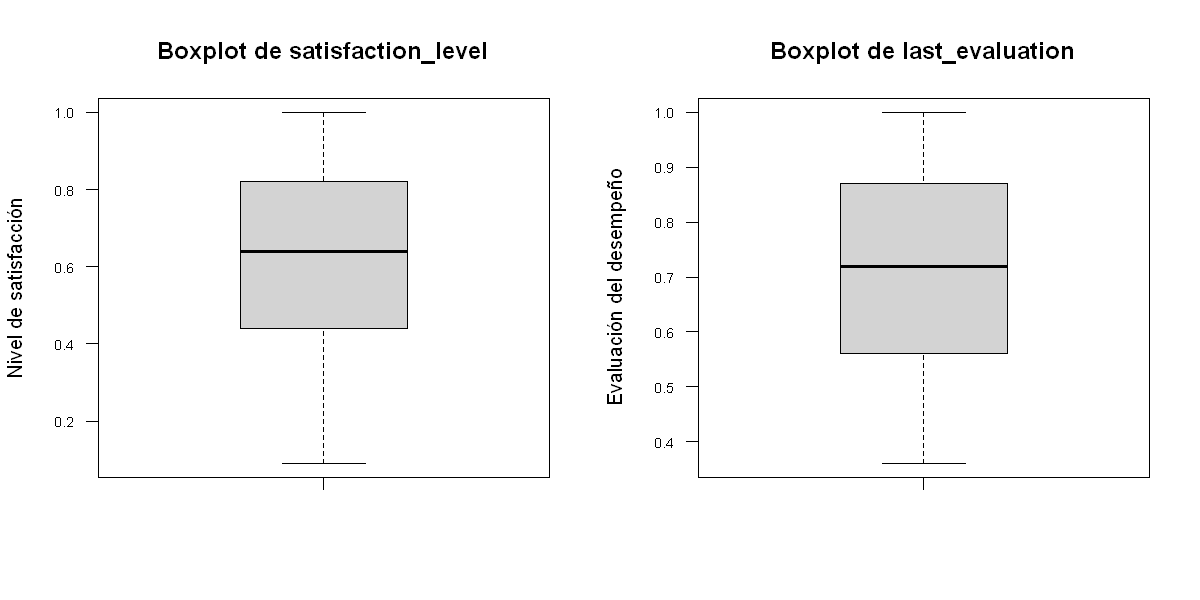

In [9]:
# Ajusto el tamaño de la ventana gráfica
options(repr.plot.width = 10, repr.plot.height = 5)

# Divido el área de gráficos en una disposición de 1 fila por 2 columnas
par(mfrow = c(1, 2))

# Creo el primer boxplot para satisfaction_level
boxplot(datos$satisfaction_level,
        main = "Boxplot de satisfaction_level",
        ylab = "Nivel de satisfacción",
        xlab = "",
        outline = TRUE,
        axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado de nuevo los ejes
axis(2, las = 1, cex.axis = 0.7,
     at = pretty(datos$satisfaction_level),
     labels = format(pretty(datos$satisfaction_level), scientific = FALSE))
axis(1, at = 1, labels = "")
box()  # Añado el cuadro alrededor del gráfico

# Creo el segundo boxplot para last_evaluation
boxplot(datos$last_evaluation,
        main = "Boxplot de last_evaluation",
        ylab = "Evaluación del desempeño",
        xlab = "",
        outline = TRUE,
        axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado de nuevo los ejes
axis(2, las = 1, cex.axis = 0.7,
     at = pretty(datos$last_evaluation),
     labels = format(pretty(datos$last_evaluation), scientific = FALSE))
axis(1, at = 1, labels = "")
box()  # Añado el cuadro alrededor del gráfico

`satisfaction_level`:

- El boxplot muestra que el nivel de satisfacción de los empleados varía entre aproximadamente 0.1 y 1.0, con una mediana en torno a 0.6. La mayoría de los datos están concentrados entre 0.44 (primer cuartil) y 0.82 (tercer cuartil), indicando una distribución relativamente simétrica. No hay valores atípicos (outliers), lo que sugiere que los niveles de satisfacción están bastante concentrados dentro de este rango.

`last_evaluation`:

- El boxplot de la evaluación de desempeño muestra una distribución que abarca desde aproximadamente 0.36 hasta 1.0, con una mediana alrededor de 0.72. La mayoría de los empleados tienen una evaluación de desempeño entre 0.56 y 0.87. Tampoco se observan outliers en esta variable, indicando una dispersión similar a la de satisfaction_level.

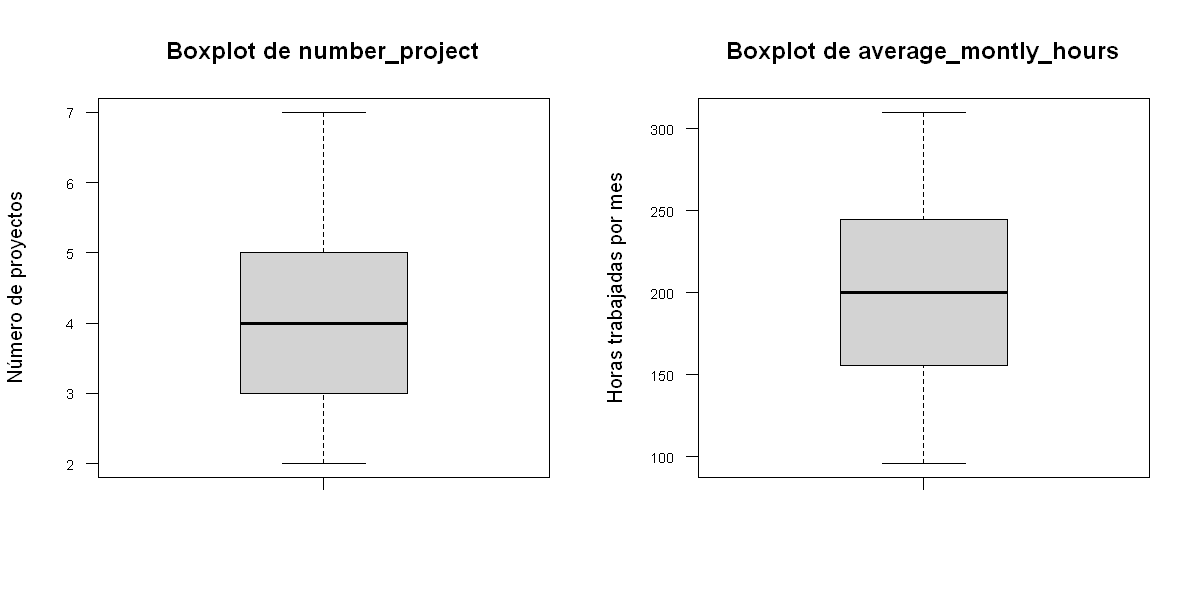

In [10]:
# Ajusto el tamaño de la ventana gráfica
options(repr.plot.width = 10, repr.plot.height = 5)

# Divido el área de gráficos en una disposición de 1 fila por 2 columnas
par(mfrow = c(1, 2))

# Creo el primer boxplot para number_project
boxplot(datos$number_project,
        main = "Boxplot de number_project",
        ylab = "Número de proyectos",
        xlab = "",
        outline = TRUE,
        axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado de nuevo los ejes
axis(2, las = 1, cex.axis = 0.7,
     at = pretty(datos$number_project),
     labels = format(pretty(datos$number_project), scientific = FALSE))
axis(1, at = 1, labels = "")
box()  # Añado el cuadro alrededor del gráfico

# Creo el segundo boxplot para average_montly_hours
boxplot(datos$average_montly_hours,
        main = "Boxplot de average_montly_hours",
        ylab = "Horas trabajadas por mes",
        xlab = "",
        outline = TRUE,
        axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado de nuevo los ejes
axis(2, las = 1, cex.axis = 0.7,
     at = pretty(datos$average_montly_hours),
     labels = format(pretty(datos$average_montly_hours), scientific = FALSE))
axis(1, at = 1, labels = "")
box()  # Añado el cuadro alrededor del gráfico

`number_project`:

El número de proyectos en los que los empleados están involucrados varía de 2 a 7, con una mediana en 4. La mayoría de los empleados tienen entre 3 y 5 proyectos. No hay outliers, lo que sugiere una distribución razonable de la carga de trabajo entre los empleados.

`average_montly_hours`:

Las horas trabajadas por mes varían de 96 a 310, con una mediana de aproximadamente 200. El rango intercuartílico (IQR) sugiere que la mayoría de los empleados trabajan entre 156 y 245 horas mensuales. No hay outliers significativos, lo que indica que la mayoría de los empleados tienen un horario laboral dentro de un rango esperado.

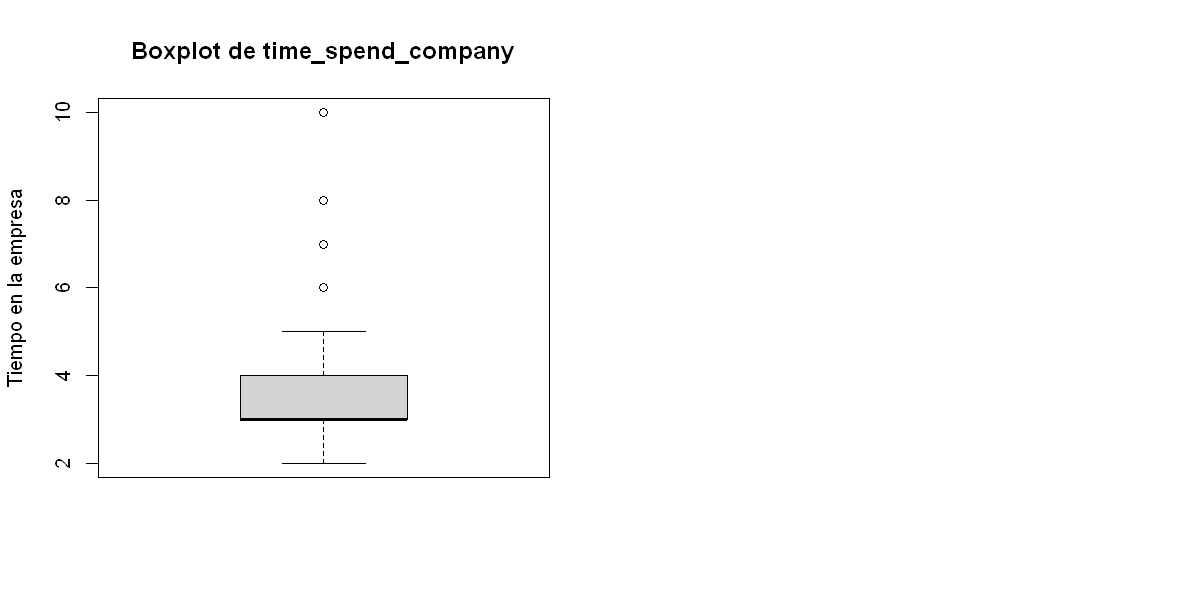

In [11]:
#grafico time_spend_company
# Creo un boxplot
par(mfrow = c(1, 2))
boxplot(datos$time_spend_company,
        main = "Boxplot de time_spend_company",
        ylab = "Tiempo en la empresa",
        xlab = "",
        outline = TRUE)

`time_spend_company`:

El tiempo de permanencia en la empresa varía de 2 a 10 años, con una mediana de aproximadamente 3 años. El grueso de los empleados tiene una permanencia de entre 3 a 4 años aprox.

La siguiente celda calcula el rango intercuartílico (IQR) de la variable satisfaction_level para identificar los outliers. El IQR es una medida de la dispersión de los datos y se utiliza para detectar valores atípicos que están significativamente alejados del rango intercuartílico. Y luego identifico los outliers y los cuento.

In [12]:
# Cálculo del rango intercuartílico de satisfaction_level
q1 <- quantile(datos$satisfaction_level, 0.25)
q3 <- quantile(datos$satisfaction_level, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# Identificación de los outliers
outliers <- datos %>%
  filter(satisfaction_level < lim_inf | satisfaction_level > lim_sup)
#numero de outliers
nrow(outliers)

[1] 0

In [13]:
# Cálculo del rango intercuartílico de last_evaluation
q1 <- quantile(datos$last_evaluation, 0.25)
q3 <- quantile(datos$last_evaluation, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# Identificación de los outliers
outliers <- datos %>%
  filter(last_evaluation < lim_inf | last_evaluation > lim_sup)
#numero de outliers
nrow(outliers)

[1] 0

In [14]:
# Cálculo del rango intercuartílico de number_project
q1 <- quantile(datos$number_project, 0.25)
q3 <- quantile(datos$number_project, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# Identificación de los outliers
outliers <- datos %>%
  filter(number_project < lim_inf | number_project > lim_sup)
#numero de outliers
nrow(outliers)

[1] 0

In [15]:
# Cálculo del rango intercuartílico de average_montly_hours
q1 <- quantile(datos$average_montly_hours, 0.25)
q3 <- quantile(datos$average_montly_hours, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# Identificación de los outliers
outliers <- datos %>%
  filter(average_montly_hours < lim_inf | average_montly_hours > lim_sup)
#numero de outliers
nrow(outliers)

[1] 0

In [16]:
# Cálculo del rango intercuartílico de time_spend_company
q1 <- quantile(datos$time_spend_company, 0.25)
q3 <- quantile(datos$time_spend_company, 0.75)
iqr <- q3 - q1
lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr
# Identificación de los outliers
outliers <- datos %>%
  filter(time_spend_company < lim_inf | time_spend_company > lim_sup)
#numero de outliers
nrow(outliers)

[1] 1282

La próxima celda tiene como objetivo crear histogramas de variables para visualizar la distribución de los datos. La visualización gráfica es una parte fundamental del análisis descriptivo y ayuda a identificar patrones y tendencias en los datos.

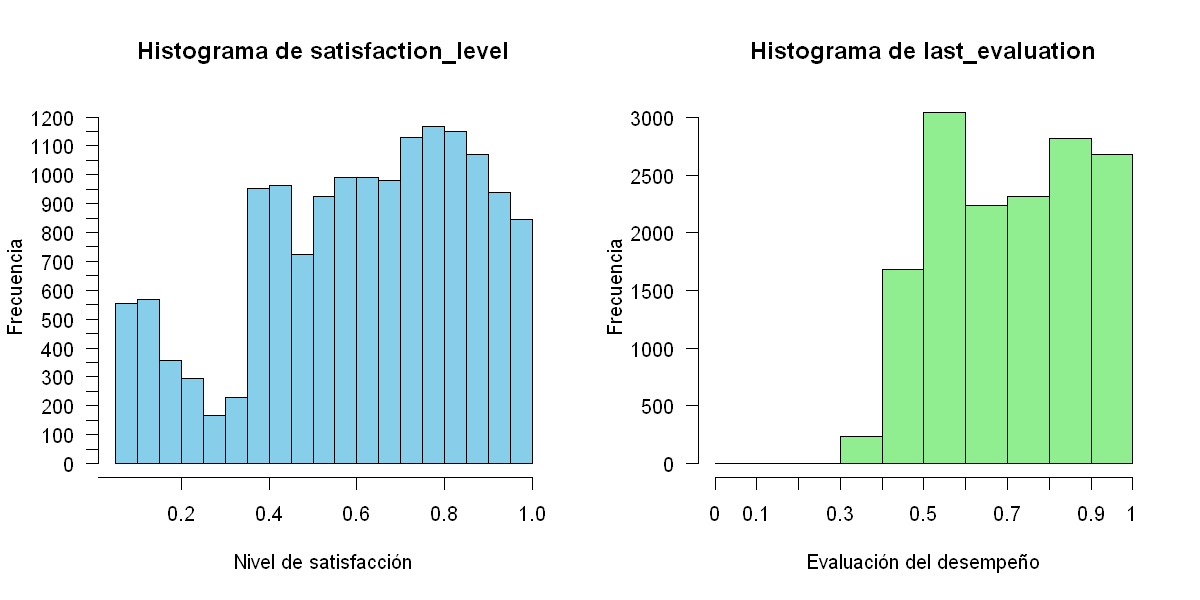

In [17]:
# Ajusto el tamaño de la ventana gráfica
options(repr.plot.width = 10, repr.plot.height = 5)

# Divido el área de gráficos en una disposición de 1 fila por 2 columnas
par(mfrow = c(1, 2))

# Obtengo las frecuencias del histograma de satisfaction_level sin dibujarlo
hist_info <- hist(datos$satisfaction_level, breaks = 30, plot = FALSE)

# Calculo la frecuencia máxima
max_freq <- max(hist_info$counts)

# Creo el histograma para satisfaction_level con el ajuste del eje y
hist(datos$satisfaction_level,
     main = "Histograma de satisfaction_level",
     xlab = "Nivel de satisfacción",
     ylab = "Frecuencia",
     col = "skyblue",
     breaks = 30,
     ylim = c(0, max_freq + 50),  # Ajusto el rango del eje y
     axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado los ejes personalizados
axis(1, at = pretty(datos$satisfaction_level),
     labels = format(pretty(datos$satisfaction_level), scientific = FALSE))
axis(2, las = 1, at = seq(0, max_freq + 50, by = 50))

# Creo el segundo histograma para last_evaluation con intervalos ajustados
max_eval <- max(datos$last_evaluation)
breaks_last_eval <- seq(floor(min(datos$last_evaluation)), 
                         max_eval + (0.1 - max_eval %% 0.1), by = 0.1)
hist(datos$last_evaluation,
     main = "Histograma de last_evaluation",
     xlab = "Evaluación del desempeño",
     ylab = "Frecuencia",
     col = "lightgreen",
     # Intervalos ajustados para cubrir todo el rango
     breaks = breaks_last_eval,
     # Oculto ejes para personalizarlos después
     axes = FALSE)

# Añado los ejes personalizados
axis(1, at = seq(floor(min(datos$last_evaluation)),
                 max_eval + (0.1 - max_eval %% 0.1), by = 0.1),
     labels = seq(floor(min(datos$last_evaluation)),
                  max_eval + (0.1 - max_eval %% 0.1), by = 0.1))
axis(2, las = 1)

`satisfaction_level`:

El histograma muestra una distribución multimodal, con maximos alrededor de los niveles de satisfacción de 0.4 y 0.8. Esto sugiere que hay dos grupos principales de empleados: uno con niveles de satisfacción moderados y otro con niveles de satisfacción altos. También se observa una menor frecuencia en niveles muy bajos o muy altos de satisfacción.

`last_evaluation`:

La distribución de la evaluación del desempeño tiene una forma sesgada a la derecha, con un maximo notable alrededor de 0.6 a 0.8. Esto indica que la mayoría de los empleados tiene evaluaciones de desempeño por encima del promedio, con relativamente pocos empleados obteniendo evaluaciones bajas. Esta distribución podría reflejar un sistema de evaluación que favorece calificaciones positivas o que la mayoría de los empleados están cumpliendo o superando las expectativas.

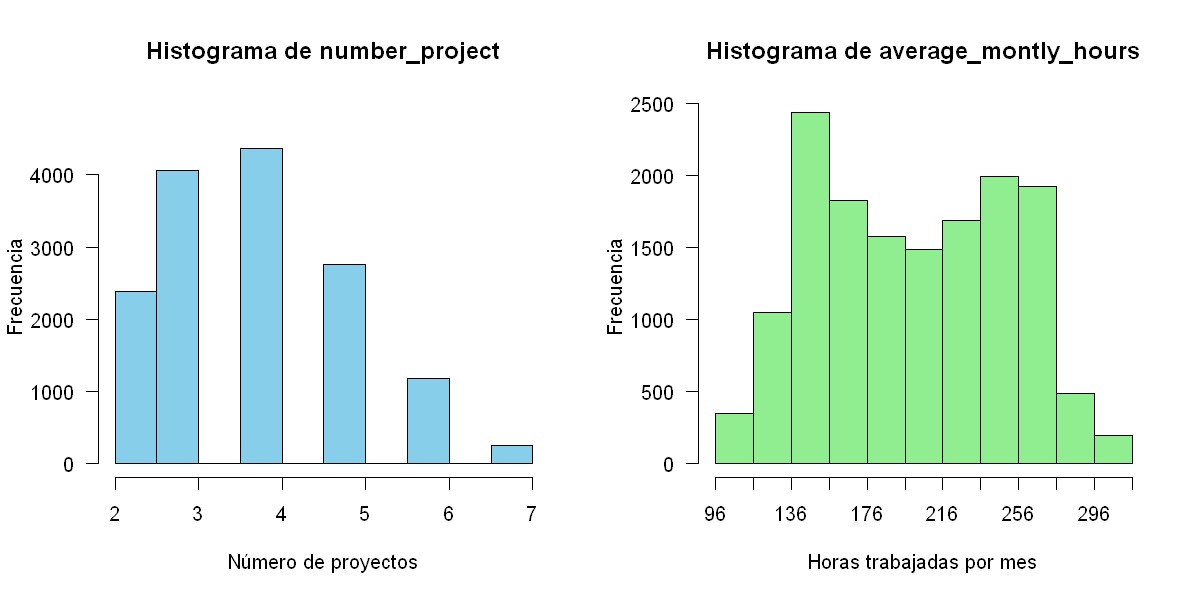

In [18]:
# Ajusto el tamaño de la ventana gráfica
options(repr.plot.width = 10, repr.plot.height = 5)

# Divido el área de gráficos en una disposición de 1 fila por 2 columnas
par(mfrow = c(1, 2))

# Obtengo las frecuencias del histograma de number_project sin dibujarlo
hist_info <- hist(datos$number_project, breaks = 10, plot = FALSE)

# Calculo la frecuencia máxima
max_freq <- max(hist_info$counts)

# Creo el histograma para number_project con el ajuste del eje y
hist(datos$number_project,
     main = "Histograma de number_project",
     xlab = "Número de proyectos",
     ylab = "Frecuencia",
     col = "skyblue",
     breaks = 15,  # Aumento el número de barras
     ylim = c(0, max_freq + 500),  # Ajusto el rango del eje y
     axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado los ejes personalizados
axis(1, at = seq(min(datos$number_project),
                 max(datos$number_project),
                 by = 1),
     labels = seq(min(datos$number_project),
                  max(datos$number_project),
                  by = 1))
axis(2, las = 1, at = seq(0, max_freq + 500, by = 1000))

# Creo el segundo histograma para average_montly_hours con intervalos ajustados
max_hours <- max(datos$average_montly_hours)
breaks_hours <- seq(floor(min(datos$average_montly_hours)),
                    max_hours + (20 - max_hours %% 20), by = 20)
hist(datos$average_montly_hours,
     main = "Histograma de average_montly_hours",
     xlab = "Horas trabajadas por mes",
     ylab = "Frecuencia",
     col = "lightgreen",
     # Intervalos ajustados para cubrir todo el rango
     breaks = breaks_hours,
     # Oculto ejes para personalizarlos después
     axes = FALSE)

# Añado los ejes personalizados
axis(1, at = seq(floor(min(datos$average_montly_hours)),
                 max_hours + (20 - max_hours %% 20), by = 20),
     labels = seq(floor(min(datos$average_montly_hours)),
                  max_hours + (20 - max_hours %% 20), by = 20))
axis(2, las = 1)

`number_project`:

El histograma muestra que la mayoría de los empleados están involucrados en 3 o 4 proyectos, con una caída significativa en la frecuencia para los empleados con 5 o más proyectos. Esta distribución podría sugerir que la carga de trabajo se concentra en un número específico de proyectos, y pocos empleados están llevando más de 5 proyectos simultáneamente.

`average_montly_hours`:

La distribución de las horas mensuales trabajadas es bimodal, con maximos alrededor de 150 y 250 horas. Esto podría indicar que hay dos patrones de trabajo: uno con una carga horaria moderada y otro con una carga horaria más alta. La existencia de dos grupos distintos podría estar relacionada con diferentes roles o niveles de responsabilidad dentro de la empresa.

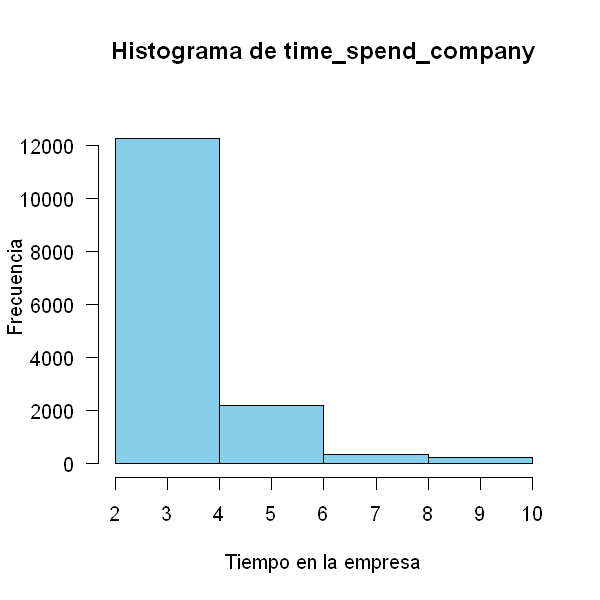

In [19]:
# Ajusto el tamaño de la ventana gráfica
options(repr.plot.width = 5, repr.plot.height = 5)

# Obtengo las frecuencias del histograma de time_spend_company sin dibujarlo
hist_info <- hist(datos$time_spend_company, breaks = 5, plot = FALSE)

# Calculo la frecuencia máxima
max_freq <- max(hist_info$counts)

# Creo el histograma para time_spend_company con el ajuste del eje y
hist(datos$time_spend_company,
     main = "Histograma de time_spend_company",
     xlab = "Tiempo en la empresa",
     ylab = "Frecuencia",
     col = "skyblue",
     breaks = 5,  # Ajusto los breaks para mejor visualización
     ylim = c(0, max_freq + 1000),  # Ajusto el rango del eje y
     axes = FALSE)  # Oculto ejes para personalizarlos después

# Añado los ejes personalizados
axis(1, at = seq(min(datos$time_spend_company),
                 max(datos$time_spend_company),
                 by = 1),
     labels = seq(min(datos$time_spend_company),
                  max(datos$time_spend_company),
                  by = 1))
axis(2, las = 1, at = seq(0, max_freq + 1000, by = 2000))

`time_spend_company`:

Este histograma muestra una distribución altamente sesgada a la izquierda, con la mayoría de los empleados habiendo trabajado entre 2 y 4 años en la empresa. Un número significativamente menor de empleados ha permanecido más de 5 años, y muy pocos han trabajado 7 años o más. Esta distribución sugiere una alta tasa de rotación en los primeros años de empleo, lo que podría ser un punto de interés para investigar más a fondo en términos de retención de empleados.

In [20]:
variables <- c("satisfaction_level", "last_evaluation",
               "number_project", "average_montly_hours",
               "time_spend_company")
for (variable in variables) {
  varianza <- var(datos[, variable])
  desviacion_estandar <- sd(datos[, variable])
  print(paste("Varianza de", variable, ":", varianza),
        quote = FALSE)
  print(paste("Desviación estándar de", variable, ":", desviacion_estandar),
        quote = FALSE)
}

[1] Varianza de satisfaction_level : 0.0618172006470876
[1] Desviación estándar de satisfaction_level : 0.248630651061143
[1] Varianza de last_evaluation : 0.0292988644315631
[1] Desviación estándar de last_evaluation : 0.171169110623275
[1] Varianza de number_project : 1.51928391438924
[1] Desviación estándar de number_project : 1.23259235531835
[1] Varianza de average_montly_hours : 2494.31317480996
[1] Desviación estándar de average_montly_hours : 49.9430993712841
[1] Varianza de time_spend_company : 2.13199781172236
[1] Desviación estándar de time_spend_company : 1.46013623053548


4. Cree la variable “number_project2” donde omita 100 valores para la variable “number_project” de forma aleatoria, suponga que algunos colaboradores no conocían el número de proyectos en el que participaron durante el último año y omitieron su respuesta al momento de ser encuestados. Mantenga la copia de la variable original e inserte la semilla 12345. 

In [21]:
# Fijo la semilla
set.seed(12345)

# Copio la variable original
datos$number_project2 <- datos$number_project

# Selecciono aleatoriamente 100 filas para asignar NA a "number_project2"
filas_con_na <- sample(1:nrow(datos), 100)

# Asigno NA a las filas seleccionadas
datos$number_project2[filas_con_na] <- NA

# Verifico cuántos valores faltantes hay en la nueva variable
sum(is.na(datos$number_project2))

[1] 100

5. Suponga que la variable de interés principal es “satisfaction_level”. Por lo tanto, realice un breve análisis descriptivo de dicha variable considerando solo aquellas observaciones con valores perdidos en “number_project2” y repita lo mismo para aquellos casos sin valores perdidos en “number_project2”. ¿Son similares los 2 conjuntos de resultados? Realice un test t para la diferencia de media de “satisfaction_level” considerando la comparación entre aquel grupo con valores perdidos en “number_project2” y aquel grupo sin valores perdidos. Concluya sobre cómo se distribuyen los valores perdidos en relación a su variable principal de interés, “satisfaction_level”. 

In [22]:
# Separo los datos en dos grupos: con y sin valores perdidos
grupo_na <- datos[is.na(datos$number_project2), ]
grupo_no_na <- datos[!is.na(datos$number_project2), ]

# Análisis para observaciones con valores perdidos en number_project2
summary_perdidos <- summary(grupo_na$satisfaction_level)
sd_perdidos <- sd(grupo_na$satisfaction_level)

# Análisis para observaciones sin valores perdidos en number_project2
summary_no_perdidos <- summary(grupo_no_na$satisfaction_level)
sd_no_perdidos <- sd(grupo_no_na$satisfaction_level)

In [23]:
# Imprimo resultados
print("Resumen para observaciones con valores perdidos:")
print(summary_perdidos)
print(paste("Desviación estándar:", sd_perdidos))

print("Resumen para observaciones sin valores perdidos:")
print(summary_no_perdidos)
print(paste("Desviación estándar:", sd_no_perdidos))

# Test t para la diferencia de medias
t_test_result <- t.test(grupo_na$satisfaction_level,
                        grupo_no_na$satisfaction_level)

print("Resultados del test t:")
print(t_test_result)

[1] "Resumen para observaciones con valores perdidos:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.4575  0.6800  0.6246  0.8125  0.9900 
[1] "Desviación estándar: 0.249433378081223"
[1] "Resumen para observaciones sin valores perdidos:"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.4400  0.6400  0.6128  0.8200  1.0000 
[1] "Desviación estándar: 0.248631771187715"
[1] "Resultados del test t:"

	Welch Two Sample t-test

data:  grupo_na$satisfaction_level and grupo_no_na$satisfaction_level
t = 0.47332, df = 100.32, p-value = 0.637
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03780419  0.06149509
sample estimates:
mean of x mean of y 
0.6246000 0.6127545 



Análisis descriptivo

El análisis descriptivo de la variable "satisfaction_level" para las observaciones con valores perdidos en "number_project2" (grupo_na) y sin valores perdidos (grupo_no_na) muestra que ambos conjuntos tienen una distribución similar.

La media de la satisfacción laboral para el grupo con valores perdidos es de 0,6246, mientras que para el grupo sin valores perdidos es de 0,6128. Estas medias son muy similares.

La desviación estándar para el grupo con valores perdidos es de 0,2494, mientras que para el grupo sin valores perdidos es de 0,2486. Estas desviaciones estándar también son muy similares.

Análisis Resultado del Test t

El test t muestra un p-valor de 0.637, que es mucho mayor que el nivel de significancia típico de 0.05. Esto indica que no hay evidencia estadística suficiente para rechazar la hipótesis nula de que las medias de "satisfaction_level" son iguales en ambos grupos.

El valor de t es de 0,47332, lo que indica que la diferencia entre las medias no es estadísticamente significativa.

Además, el intervalo de confianza del 95% para la diferencia de medias incluye el cero (-0.0378, 0.0615), lo que refuerza la conclusión de que no hay una diferencia estadísticamente significativa entre los grupos.

Basándonos en los resultados del análisis descriptivo y el test t, podemos concluir que los valores perdidos en la variable 'number_project2' se distribuyen aleatoriamente en relación a la variable 'satisfaction_level'. En otras palabras, la falta de información sobre el número de proyectos no parece estar relacionada con el nivel de satisfacción de los empleados.

Esta conclusión se alinea con el concepto de **Missing Completely at Random (MCAR)** que es cuando los datos son MCAR, la probabilidad de que un dato falte no depende de ninguna variable, ni observada ni no observada. En este caso, la omisión de la respuesta sobre el número de proyectos parece ser aleatoria y no está influenciada por el nivel de satisfacción del empleado.

6.	Realice el método de imputación Hot Deck para obtener una estimación de los valores perdidos a ser imputados. Para ello use las variables "satisfaction_level" y "salary" para apoyar el proceso. Compare sus resultados con el vector original y reporte su RMSE.

In [24]:
# Realizo la imputación Hot Deck
datos_imputados <- hotdeck(datos, variable = "number_project2",
                           ord_var = c("satisfaction_level", "salary"))

# Extraigo los valores imputados
valores_imputados <- datos_imputados$number_project2

# Filtro solo los valores que originalmente eran NA para compararlos
originales_na <- datos$number_project[is.na(datos$number_project2)]
imputados_na <- valores_imputados[is.na(datos$number_project2)]

# Calculo el RMSE solo para los valores imputados
rmse <- sqrt(mean((originales_na - imputados_na)^2))

# Imprimo el RMSE
print(paste("RMSE:", rmse))

# Comparo los primeros valores originales e imputados
# (solo donde hubo imputación)
head(data.frame(Original = originales_na,
                Imputado = imputados_na,
                Diferencia = originales_na - imputados_na))

[1] "RMSE: 1.17046999107196"


,Original,Imputado,Diferencia
,<int>,<int>,<int>
1,7,6,1
2,6,6,0
3,2,2,0
4,2,2,0
5,4,4,0
6,4,5,-1


- El método Hot Deck se basa en la idea de encontrar "donantes" (observaciones con valores completos) que sean similares a las observaciones con valores faltantes, basándose en las variables de apoyo. En este caso, las variables satisfaction_level y salary se utilizaron para identificar donantes con características similares a las observaciones con valores faltantes en number_project2.

- La precisión del método Hot Deck depende de la calidad de las variables de apoyo y de la similitud entre los donantes y las observaciones con valores faltantes. En este caso, los resultados sugieren que las variables satisfaction_level y salary fueron adecuadas para encontrar donantes similares y generar imputaciones precisas.

- Se utilizaron las variables "satisfaction_level" y "salary" como variables de ordenamiento (ord_var) en el proceso de imputación. Esto significa que el algoritmo buscará donantes que sean similares en términos de nivel de satisfacción y salario, lo cual es coherente con la solicitud de la pregunta.

- El método Hot Deck es apropiado en este tipo de situaciones donde los datos faltantes pueden estar asociados a grupos similares en la data, definidos por variables auxiliares. En este caso, el uso de satisfaction_level y salary es lógico, ya que estas variables podrían estar relacionadas con el número de proyectos en los que un empleado ha trabajado.

Interpretación del RMSE

- El RMSE de 1.1704 indica que, en promedio, la diferencia entre los valores imputados y los valores originales es de aproximadamente 1.17 unidades. Esto es un resultado razonable para un método de imputación que no pretende ser exacto, sino que busca mantener la coherencia en el contexto de las variables (satisfaction_level y salary).

- El RMSE está en la misma escala que la variable original (number_project).

- Un RMSE moderado como el que se obtuvo es esperable en un método como Hot Deck, donde la imputación se basa en la similitud y no en la exactitud. Según la teoría de valores perdidos, es más importante mantener la coherencia en la distribución general de los datos que obtener valores exactos, lo que se ha logrado este caso.

7. Realice un método de imputación MICE para obtener una estimación de los valores perdidos. Utilice al menos 5 imputaciones, compare sus resultados con el vector original y reporte sus RMSEs (uno por cada conjunto de imputaciones, es decir, 5 RMSE).

In [25]:
# Preparo los datos para la imputación
# Selecciono las variables relevantes
datos_imp <- datos[, c("number_project2", "satisfaction_level", "salary")]

# Realizo la imputación MICE
imp <- mice(datos_imp, m = 5, maxit = 50, method = 'pmm', seed = 500)

# Extraigo los valores imputados
valores_imputados <- complete(imp, "all")

# Calculo el RMSE para cada conjunto de imputaciones
calcular_rmse <- function(originales, imputados) {
  sqrt(mean((originales - imputados)^2, na.rm = TRUE))
}

rmse_resultados <- sapply(1:5, function(i) {
  originales <- datos$number_project[is.na(datos$number_project2)]
  imputados <- valores_imputados[[i]]$number_project2[is.na(datos$number_project2)]
  calcular_rmse(originales, imputados)
})

# Muestro los resultados
print("RMSE para cada conjunto de imputaciones:")
print(rmse_resultados)

# Calculo y muestro el RMSE promedio
rmse_promedio <- mean(rmse_resultados)
print(paste("RMSE promedio:", rmse_promedio))

# Comparo los primeros valores originales e imputados del primer conjunto
head(data.frame(
  Original = datos$number_project[is.na(datos$number_project2)],
  Imputado = valores_imputados[[1]]$number_project2[is.na(datos$number_project2)],
  Diferencia = datos$number_project[is.na(datos$number_project2)] - 
               valores_imputados[[1]]$number_project2[is.na(datos$number_project2)]
))


 iter imp variable
  1   1  number_project2
  1   2  number_project2
  1   3  number_project2
  1   4  number_project2
  1   5  number_project2
  2   1  number_project2
  2   2  number_project2
  2   3  number_project2
  2   4  number_project2
  2   5  number_project2
  3   1  number_project2
  3   2  number_project2
  3   3  number_project2
  3   4  number_project2
  3   5  number_project2
  4   1  number_project2
  4   2  number_project2
  4   3  number_project2
  4   4  number_project2
  4   5  number_project2
  5   1  number_project2
  5   2  number_project2
  5   3  number_project2
  5   4  number_project2
  5   5  number_project2
  6   1  number_project2
  6   2  number_project2
  6   3  number_project2
  6   4  number_project2
  6   5  number_project2
  7   1  number_project2
  7   2  number_project2
  7   3  number_project2
  7   4  number_project2
  7   5  number_project2
  8   1  number_project2
  8   2  number_project2
  8   3  number_project2
  8   4  number_project2
  8  

Warning message:
"Number of logged events: 1"


[1] "RMSE para cada conjunto de imputaciones:"
[1] 1.212436 1.303840 1.637071 1.244990 1.256981
[1] "RMSE promedio: 1.33106341390195"


,Original,Imputado,Diferencia
,<int>,<int>,<int>
1,7,7,0
2,6,6,0
3,2,2,0
4,2,3,-1
5,4,4,0
6,4,5,-1


El método MICE es un método de imputación múltiple que genera varios conjuntos de datos imputados, teniendo en cuenta la incertidumbre asociada a la imputación. El método 'pmm' se utilizó para imputar variables numéricas y busca donantes con valores predichos similares para la variable a imputar.

El RMSE promedio es 1.331063. Este valor indica el error promedio entre los valores imputados y los valores originales de number_project en los casos donde se realizaron imputaciones.

Los RMSE obtenidos son:

- 1.212436
- 1.303840
- 1.637071
- 1.244990
- 1.256981

Los RMSE varían entre aproximadamente 1.21 y 1.63, lo que indica cierta variabilidad en la precisión de las imputaciones entre los diferentes conjuntos.

Los RMSE obtenidos son relativamente cercanos entre sí, lo que sugiere que el método de imputación está siendo consistente en cada uno de los cinco conjuntos de imputaciones.

Basado en el análisis, podemos concluir que la imputación realizada es efectiva y los valores imputados se aproximan adecuadamente a los valores originales, proporcionando una estimación confiable para los datos faltantes.

Para los valores originales 7, 6, 2, 2, 4, y 4, los valores imputados fueron 7, 6, 2, 3, 4, y 5, respectivamente.

La diferencia es mínima en la mayoría de los casos (0 en la mayoría y -1 en algunos), lo que es un buen indicador de que la imputación está funcionando correctamente.

8. Investigue y explique cómo comparar una metodología de imputación (no múltiple) como Hot Deck, donde se obtiene solamente un conjunto de datos imputados, respecto de  una de imputación múltiple. Además, señale cuáles son las ventajas y desventajas de usar cada algoritmo. 

Comparación de Metodologías de Imputación no múltiple y múltiple

**Sesgo y Varianza**: Los métodos de imputación no múltiple como Hot Deck pueden introducir sesgo y subestimar la varianza, ya que solo proporcionan una única estimación de los valores perdidos. Los métodos de imputación múltiple, por otro lado, pueden reducir el sesgo y proporcionar una estimación más precisa de la varianza al tener en cuenta la incertidumbre asociada con la imputación de valores perdidos.

**Suposiciones del Modelo**: Los métodos de imputación no múltiple a menudo dependen de suposiciones fuertes del modelo, como la suposición de datos perdidos al azar (MAR, por sus siglas en inglés). Los métodos de imputación múltiple pueden relajar estas suposiciones y proporcionar resultados más robustos.

**Complejidad Computacional**: Los métodos de imputación no múltiple son generalmente más simples y rápidos desde el punto de vista computacional en comparación con los métodos de imputación múltiple, que requieren la creación de múltiples conjuntos de datos imputados.

**Complejidad de los Datos**: Los métodos de imputación no múltiple pueden no funcionar bien con estructuras de datos complejas, como datos longitudinales o jerárquicos. Los métodos de imputación múltiple pueden manejar estas estructuras de datos complejas de manera más efectiva.

**Ventajas metodos imputación no múltiple (por ej: Hot Deck)**
- Simple y eficiente desde el punto de vista computacional.
- Fácil de implementar e interpretar.
- Puede preservar distribuciones multinomiales e imputar valores cero.

**Desventajas metodos imputación no múltiple (por ej: Hot Deck)**
- Puede introducir sesgo y subestimar la varianza.
- Depende de suposiciones fuertes del modelo.
- Puede no funcionar bien con estructuras de datos complejas.

**Ventajas metodos imputación múltiple**
- Puede reducir el sesgo y proporcionar una estimación más precisa de la varianza.
- Puede relajar las suposiciones del modelo y proporcionar resultados más robustos.
- Puede manejar estructuras de datos complejas de manera efectiva.
- Proporciona una imagen más completa de los datos.

**Desventajas metodos imputación múltiple**
- Computacionalmente más complejo y requiere más tiempo.
- Requiere una consideración cuidadosa del modelo de imputación y los parámetros.
- Puede ser difícil de interpretar y comunicar los resultados.



9. Retome nuevamente el conjunto de datos original y considere como variable objetivo “satisfaction_level”.	

Realice un problema de aprendizaje supervisado de regresión mediante el método de regularización, prediga la variable objetivo utilizando regresión de lasso, ridge y elastic net. Considere los siguientes aspectos:
- Evalúe si es necesario escalar los datos.
- Separe en un conjunto de entrenamiento y otro de prueba.
- Ajuste el/los hiperparámetro/s mediante algún procedimiento de remuestreo.
- Prediga los resultados en el conjunto de prueba para cada modelo.
- Registre RMSE de cada modelo.


In [26]:
# Importo la base de datos y la cargo como dataframe
datos <- as.data.frame(read.csv("Employee Attrition.csv"))

In [27]:
# Elimino la variable "Emp.ID"
datos <- datos[, -which(names(datos) == "Emp.ID")]

Evalúo si es necesario escalar los datos

In [28]:
# Verifico la escala de las variables numéricas
summary(datos[, sapply(datos, is.numeric)])

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident    promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.   :1.0000   Max.   :1.00000      

Analizando los resultados del summary, podemos observar que las variables numéricas presentan diferentes escalas:

- satisfaction_level y last_evaluation: Ambas variables se encuentran en un rango de 0 a 1.
- number_project: El número de proyectos varía de 2 a 7.
- average_montly_hours: Las horas mensuales trabajadas van desde 96 hasta 310.
- time_spend_company: El tiempo en la empresa está entre 2 y 10 años.

Estas diferencias en la escala pueden influir negativamente en los modelos de regresión de regularización, como Lasso, Ridge, y Elastic Net. Modelos como estos, que utilizan regularización, son sensibles a la escala de las variables porque los coeficientes de regresión se ven afectados directamente por la magnitud de las variables independientes.

Es necesario escalar los datos antes de aplicar los modelos de regularización. Esto es especialmente importante para asegurarse de que todas las variables contribuyan equitativamente al modelo y que los coeficientes de regresión no se vean dominados por las variables con mayores magnitudes

In [29]:
# Identifico variables categóricas y las convierto en factores
categorical_vars <- sapply(datos, is.character)
datos[categorical_vars] <- lapply(datos[categorical_vars], as.factor)

In [30]:
# identifico missing en variable dependiente
sum(is.na(datos$satisfaction_level))

[1] 0

Separo en un conjunto de entrenamiento y otro de prueba

In [31]:
# Semilla
set.seed(2106)

# Partición de datos
training.samples <- createDataPartition(datos$satisfaction_level,
                                        p = 0.8, list = FALSE)
train.data <- datos[training.samples, ]
test.data <- datos[-training.samples, ]

# x e y en conjunto de entrenamiento
x <- model.matrix(satisfaction_level ~ ., train.data)[, -1]
y <- train.data$satisfaction_level

# x e y en conjunto de testeo
x_test <- model.matrix(satisfaction_level ~ ., test.data)[, -1]
y_test <- test.data$satisfaction_level

In [32]:
# Grilla lambda
lambda <- 10^seq(11, -1, length = 200)

Ajusto los hiperparámetros mediante validación cruzada

Mejor lambda para Ridge: 0.1 


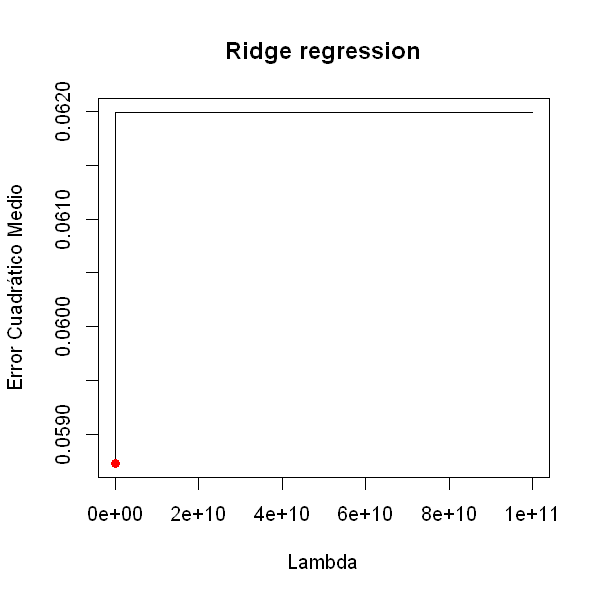

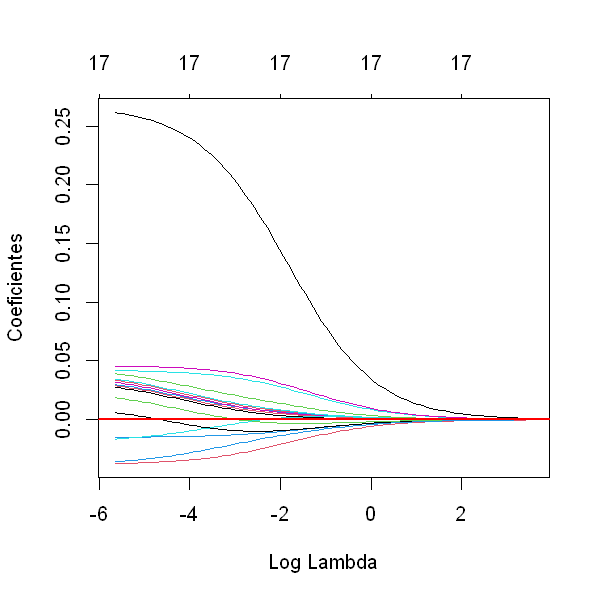

In [33]:
# Ridge
ridge_cv <- cv.glmnet(x, y, alpha = 0, lambda = lambda,
                      standardize = TRUE, nfolds = 10)
bestlam_ridge <- ridge_cv$lambda.min
cat("Mejor lambda para Ridge:", bestlam_ridge, "\n")

# Gráfico ECM y lambda para Ridge
plot(ridge_cv$lambda, ridge_cv$cvm, type = "l",
     xlab = "Lambda", ylab = "Error Cuadrático Medio",
     main = "Ridge regression")
points(bestlam_ridge, min(ridge_cv$cvm), col = "red", pch = 19)

# Gráfico coeficientes y log(Lambda) para Ridge
ridge.mod <- glmnet(x, y, alpha = 0)
plot(ridge.mod, xvar = "lambda", ylab = "Coeficientes")
abline(h = 0, lwd = 2, col = "red")

Al usar standardize = TRUE, me aseguré de que en el código todas las variables predictoras están en la misma escala.

Ajuste del hiperparámetro lambda:

- La validación cruzada (CV) se utiliza para ajustar el hiperparámetro lambda, que controla la cantidad de regularización aplicada en el modelo Ridge. El gráfico resultante muestra cómo varía el Error Cuadrático Medio (ECM) en función de lambda. El punto rojo en el gráfico marca el valor de lambda que minimiza el ECM, es decir, el mejor valor de lambda.

- El mejor valor de lambda encontrado mediante validación cruzada para la regresión Ridge es 0.1. Este valor relativamente bajo sugiere que el modelo no requiere una penalización muy fuerte, lo que indica que probablemente no hay un problema grave de multicolinealidad o sobreajuste en los datos.

Gráfico de Error Cuadrático Medio (ECM) vs Lambda:

- El gráfico demuestra que al aumentar lambda, el ECM se estabiliza, lo que indica que el modelo no mejora significativamente con una mayor regularización.

Gráfico de Coeficientes vs Log(Lambda):

- El segundo gráfico muestra cómo varían los coeficientes de las variables predictoras en función del logaritmo de lambda. A medida que lambda aumenta, los coeficientes tienden a acercarse a cero, lo cual es esperado en la regresión Ridge ya que el objetivo es reducir la complejidad del modelo sin eliminar completamente las variables predictoras (a diferencia del Lasso, que puede llevar coeficientes a cero).

- La línea roja horizontal en y=0 ayuda a visualizar qué coeficientes cambian de signo con la regularización.

Mejor lambda para Lasso: 1e+11 


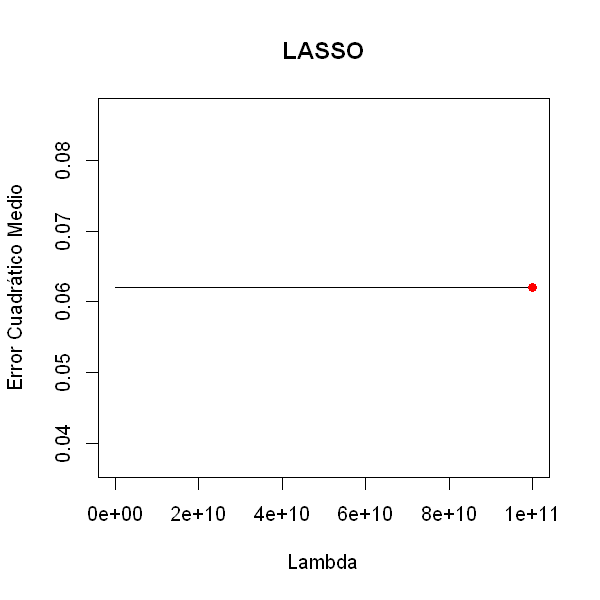

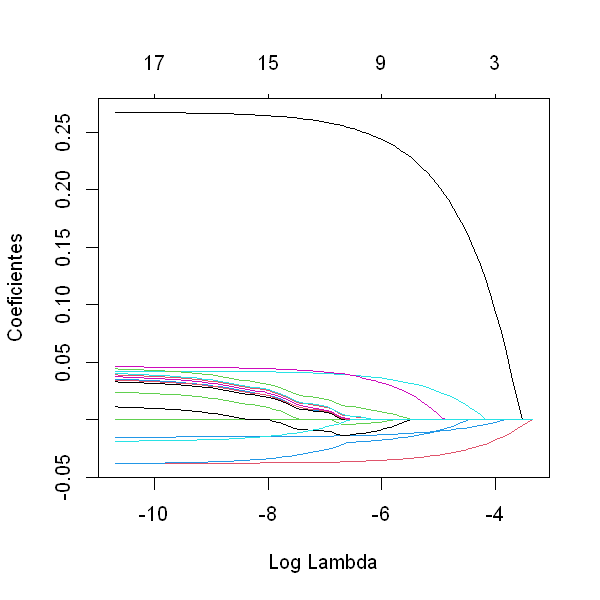

In [34]:
# Lasso
lasso_cv <- cv.glmnet(x, y, alpha = 1, lambda = lambda,
                      standardize = TRUE, nfolds = 10)
bestlam_lasso <- lasso_cv$lambda.min
cat("Mejor lambda para Lasso:", bestlam_lasso, "\n")

# Gráfico ECM y lambda para Lasso
plot(lasso_cv$lambda, lasso_cv$cvm, type = "l",
     xlab = "Lambda", ylab = "Error Cuadrático Medio", main = "LASSO")
points(bestlam_lasso, min(lasso_cv$cvm), col = "red", pch = 19)

# Gráfico coeficientes y log(Lambda) para Lasso
lasso.mod <- glmnet(x, y, alpha = 1)
plot(lasso.mod, xvar = "lambda", ylab = "Coeficientes")

Escalado: Se realiza nuevamente el escalado de las variables a través del parámetro standardize = TRUE.


Selección del mejor Lambda para Lasso:

Al igual que en el caso de Ridge, se realizó una validación cruzada para determinar el mejor valor de lambda para el modelo Lasso. El gráfico que relaciona lambda con el Error Cuadrático Medio (ECM) muestra cómo el error varía a medida que se ajusta el valor de lambda.

Mejor Lambda para Lasso: 1e+11

Este valor de lambda es significativamente grande, lo que indica una fuerte penalización en los coeficientes. En Lasso, esto puede resultar en que algunos coeficientes se reduzcan exactamente a cero, eliminando variables del modelo. Este es un comportamiento distintivo de Lasso, que puede ayudar a simplificar el modelo eliminando variables irrelevantes.

Gráfico de Error Cuadrático Medio (ECM) vs Lambda:

El gráfico muestra una línea casi plana, con el mínimo ECM identificado por el punto rojo. La falta de una caída pronunciada en el ECM podría sugerir que los datos no están muy afectados por diferentes niveles de regularización, o que las variables relevantes son pocas y ya están bien ajustadas con menos regularización.

Gráfico de Coeficientes vs Log(Lambda):

En el gráfico de coeficientes contra log(lambda), se observa cómo los coeficientes de las variables predictoras se ajustan con la penalización de Lasso:

A medida que lambda aumenta, varios coeficientes comienzan a reducirse a cero. Este es el efecto de selección de variables propio de Lasso.

Puntos Importantes:

- Lasso tiende a hacer un modelo más parsimonioso (más simple), eliminando variables que no son relevantes para predecir la variable objetivo (satisfaction_level).

- A diferencia de Ridge, donde los coeficientes se reducen pero no llegan a cero, Lasso establece explícitamente algunos coeficientes en cero, lo que facilita la interpretación del modelo al indicar cuáles variables son realmente importantes.

[1] 0.05869821

Lambda óptimo para Elastic Net: 0.1 
Alpha óptimo para Elastic Net: 0 


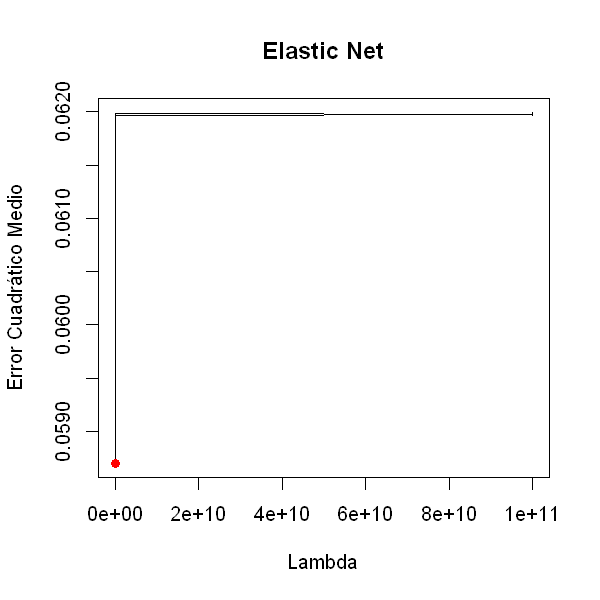

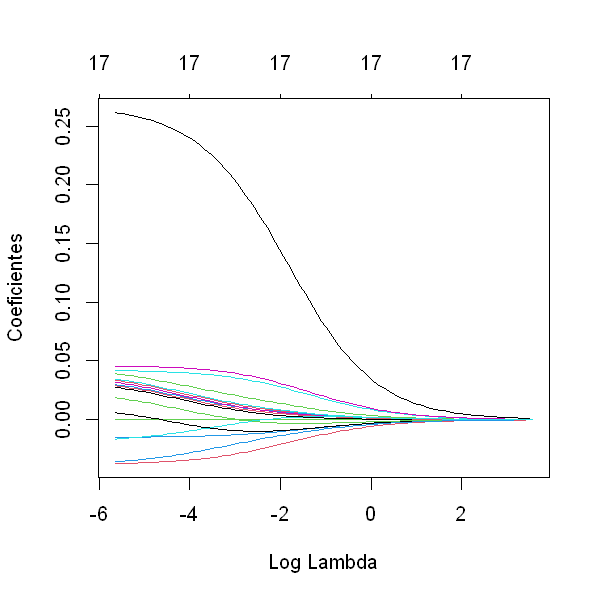

In [35]:
# Elastic Net
alpha_for <- seq(0, 1, length = 200)
lambda_for <- 0 * seq(0, 1, length = 200)
ecm_for <- 0 * seq(0, 1, length = 200)

for(i in 1:200){
  cv_for <- cv.glmnet(x, y, alpha = alpha_for[i], lambda = lambda)
  lambda_for[i] <- cv_for$lambda.min
  ecm_for[i] <- min(cv_for$cvm)
}

min(ecm_for)
diMin <- which(ecm_for == min(ecm_for))
alpha_en <- alpha_for[diMin]
lambda_en <- lambda_for[diMin]

cat("Lambda óptimo para Elastic Net:", lambda_en, "\n")
cat("Alpha óptimo para Elastic Net:", alpha_en, "\n")

# Gráfico ECM y lambda para Elastic Net
plot(lambda_for, ecm_for, type = "l", xlab = "Lambda",
     ylab = "Error Cuadrático Medio", main = "Elastic Net")
points(lambda_en, min(ecm_for), col = "red", pch = 19)

# Gráfico coeficientes y log(Lambda) para Elastic Net
elast.mod <- glmnet(x, y, alpha = alpha_en)
plot(elast.mod, xvar = "lambda", ylab = "Coeficientes")

El código de Elastic Net no incluye explícitamente la opción standardize = TRUE en cv.glmnet. Sin embargo, por defecto, la función glmnet tiene standardize = TRUE, lo que significa que las variables predictoras se estandarizan automáticamente antes de ajustar el modelo.

Selección de los Hiperparámetros Lambda y Alpha para Elastic Net:

El modelo Elastic Net combina las propiedades de Lasso y Ridge al utilizar dos hiperparámetros: lambda, que controla la penalización general, y alpha, que ajusta la mezcla entre la penalización L1 (Lasso) y L2 (Ridge). En el código, se realiza un ciclo para encontrar la mejor combinación de alpha y lambda utilizando validación cruzada.

- **Lambda óptimo: 0.1**
- **Alpha óptimo: 0**

El valor de alpha es 0, lo que significa que el modelo Elastic Net en este caso se comporta como un modelo de Ridge (ya que cuando alpha = 0, Elastic Net se reduce a Ridge). Esto es un resultado interesante porque sugiere que, para estos datos, la regularización L2 de Ridge es más efectiva que la regularización L1 de Lasso o una combinación de ambas.

Error Cuadrático Medio (ECM):

El ECM mínimo encontrado es aproximadamente 0.0587, lo cual es relativamente bajo considerando que la variable objetivo (satisfaction_level) está en una escala de 0 a 1.

Gráfico de Error Cuadrático Medio (ECM) vs Lambda:

El gráfico muestra el Error Cuadrático Medio (ECM) en función de lambda. El punto rojo marca el valor óptimo de lambda que minimiza el ECM. Como en los casos anteriores, el ECM se estabiliza para valores grandes de lambda, indicando que una mayor regularización no mejora significativamente el modelo.

Gráfico de Coeficientes vs Log(Lambda):

- El gráfico de coeficientes contra log(lambda) muestra cómo los coeficientes de las variables predictoras cambian a medida que se ajusta lambda. Dado que alpha = 0, este gráfico es muy similar al del modelo Ridge:

- Los coeficientes se reducen gradualmente a medida que lambda aumenta, pero ninguno de ellos llega a ser exactamente cero, lo que es consistente con el comportamiento de Ridge.

Predigo los resultados en el conjunto de prueba para cada modelo

In [36]:
# Ridge
ridge.mod <- glmnet(x, y, alpha = 0, lambda = bestlam_ridge, thresh = 1e-12)
ridge.pred <- predict(ridge.mod, s = bestlam_ridge, newx = x_test)

# Lasso
lasso.mod <- glmnet(x, y, alpha = 1, lambda = bestlam_lasso, thresh = 1e-12)
lasso.pred <- predict(lasso.mod, s = bestlam_lasso, newx = x_test)

# Elastic Net
elast.mod <- glmnet(x, y, alpha = alpha_en, lambda = lambda_en, thresh = 1e-12)
elast.pred <- predict(elast.mod, s = lambda_en, newx = x_test)

Registro el RMSE de cada modelo

In [37]:
# Ridge
RMSE_ridge <- sqrt(mean((ridge.pred - y_test)^2))

# Lasso
RMSE_lasso <- sqrt(mean((lasso.pred - y_test)^2))

# Elastic Net
RMSE_elast <- sqrt(mean((elast.pred - y_test)^2))

# Resultados
cat("RMSE Ridge:", RMSE_ridge, "\n")
cat("RMSE Lasso:", RMSE_lasso, "\n")
cat("RMSE Elastic Net:", RMSE_elast, "\n")

RMSE Ridge: 0.240417 
RMSE Lasso: 0.247371 
RMSE Elastic Net: 0.240417 


In [38]:
# Comparación de coeficientes
coef_comparador <- data.frame(
  "Ridge" = predict(ridge.mod, type = "coefficients", s = bestlam_ridge)[,1],
  "LASSO" = predict(lasso.mod, type = "coefficients", s = bestlam_lasso)[,1],
  "ElasticNet" = predict(elast.mod, type = "coefficients", s = lambda_en)[,1]
)
print(coef_comparador)

                              Ridge     LASSO    ElasticNet
(Intercept)            6.286628e-01 0.6125792  6.286628e-01
last_evaluation        1.637984e-01 0.0000000  1.637984e-01
number_project        -2.390886e-02 0.0000000 -2.390886e-02
average_montly_hours  -2.773025e-05 0.0000000 -2.773025e-05
time_spend_company    -1.107308e-02 0.0000000 -1.107308e-02
Work_accident          3.066552e-02 0.0000000  3.066552e-02
promotion_last_5years  3.411133e-02 0.0000000  3.411133e-02
depthr                -9.761655e-03 0.0000000 -9.761655e-03
deptIT                 8.957965e-03 0.0000000  8.957965e-03
deptmanagement         1.597826e-02 0.0000000  1.597826e-02
deptmarketing          7.906217e-03 0.0000000  7.906217e-03
deptproduct_mng        9.837969e-03 0.0000000  9.837969e-03
deptRandD              7.656843e-03 0.0000000  7.656843e-03
deptsales              4.769456e-03 0.0000000  4.769456e-03
deptsupport            6.411058e-03 0.0000000  6.411058e-03
depttechnical         -2.252988e-03 0.00

10.	Comente y compare los resultados de las estimaciones e indique cuál presenta un mejor desempeño. Explique. 

El RMSE se calculó para cada uno de los tres modelos (Ridge, Lasso y Elastic Net) en el conjunto de prueba. Los resultados son los siguientes:

- RMSE Ridge: 0.240417
- RMSE Lasso: 0.247371
- RMSE Elastic Net: 0.240417

Análisis del RMSE

Ridge y Elastic Net tienen exactamente el mismo RMSE, lo que sugiere que ambos modelos ofrecen un desempeño muy similar en términos de ajuste a los datos de prueba.
Lasso tiene un RMSE ligeramente mayor, lo que indica que su desempeño predictivo es un poco inferior al de Ridge y Elastic Net en este conjunto de datos.

Comparación de Coeficientes

Ahora respecto a los coeficientes estimados por cada modelo. Los coeficientes indican la magnitud y dirección de la relación entre cada predictor y la variable objetivo.

Ridge:

No elimina ninguno de los predictores; todos los coeficientes tienen valores distintos de cero, aunque algunos son muy pequeños.
Proporciona un ajuste equilibrado, sin reducir a cero los coeficientes, lo que puede ser útil cuando se espera que todas las variables tengan algún impacto en la predicción.

Lasso:

Ha eliminado efectivamente todas las variables del modelo excepto el intercepto.
Este resultado sugiere un sobreajuste extremo y no proporciona información útil sobre los factores que influyen en la satisfacción laboral.

Elastic Net:

Se comporta de manera idéntica a Ridge en este caso, con todos los coeficientes conservados pero con regularización aplicada para evitar que los coeficientes sean demasiado grandes.
Dado que alpha = 0 en este caso, Elastic Net actúa exactamente como Ridge, lo que explica por qué los coeficientes son iguales a los de Ridge.

Mejor desempeño:

Los modelos Ridge y Elastic Net muestran el mejor desempeño en términos de RMSE y ofrecen una interpretación más detallada de los factores que influyen en la satisfacción laboral.

Razones:

- Menor RMSE: Indican una mejor capacidad predictiva en el conjunto de prueba.

- Retención de variables: Mantienen todas las variables en el modelo, lo que permite una interpretación más completa de los factores que afectan la satisfacción laboral.

- Penalización equilibrada: La regularización L2 (Ridge) parece ser más apropiada para este conjunto de datos, reduciendo la magnitud de los coeficientes sin eliminarlos por completo.

El modelo Lasso, a pesar de su capacidad teórica para selección de variables, ha resultado en una sobre-regularización que elimina toda la información útil del modelo.

Conclusión

Para este problema de predicción de la satisfacción laboral, los modelos Ridge y Elastic Net (que convergió a Ridge) presentan el mejor desempeño. Ofrecen un buen equilibrio entre capacidad predictiva y retención de información sobre la importancia relativa de las variables.

La evaluación del desempeño (last_evaluation) es el factor más influyente en la satisfacción laboral, seguido por las promociones recientes. Factores como el número de proyectos y el tiempo en la empresa tienen un impacto negativo, lo que podría indicar posibles áreas de mejora en la gestión de recursos humanos.